In [1]:
seeds = [418, 627, 960, 426, 16, 523, 708, 541, 747, 897, 714, 127, 657, 662, 284, 595, 852, 734, 136, 394,
             321, 200, 502, 786, 817, 264, 929, 407, 515, 411]

In [2]:
import pandas as pd
from sklearn.metrics import roc_curve, accuracy_score, balanced_accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
import numpy as np
from typing import Dict
from statistics import mean, stdev

def get_df(path: str, seed) -> pd.DataFrame:
    df = pd.read_csv(path, header=None)
    df = df.rename(columns={0: "inference", 1: "ground_truth"})
    df["seed"] = seed
    df["ground_truth"] = df["ground_truth"].astype(float)
    return df

def get_best_treshold(ground_truths: np.ndarray, inferences: np.ndarray):
    fpr, tpr, tresholds = roc_curve(ground_truths, inferences)
    return tresholds[np.argmin(np.abs(tpr + fpr - 1))]

def get_predictions(inferences: np.ndarray, treshold):
    return np.where(inferences >= treshold, 1, 0)

def get_scores(results: Dict):
    datasets = ["deepmirtar", "miraw", "mirtarraw"]
    metrics = {"balanced_acc": balanced_accuracy_score, "f1": f1_score, "precision": precision_score, "recall": recall_score, "auc": roc_auc_score}
    for dataset in datasets:
        metric_scores = {key:[] for key in metrics.keys()}
        for seed in seeds:
            df = results[dataset]
            df = df[df["seed"]==seed]
            ground_truths = df["ground_truth"].to_numpy()
            inferences = df["inference"].to_numpy()
            prediction_treshold = get_best_treshold(ground_truths, inferences)
            predictions = get_predictions(inferences, prediction_treshold)
            for key, metric in metrics.items():
                score = metric(ground_truths, predictions)
                metric_scores[key].append(score)
        print_metric_scores(metric_scores, dataset)

def print_metric_scores(metric_scores, dataset, graph_layer=None):
    print("##########################")
    if graph_layer:
        print("Dataset: {}, Graph layer: {}".format(dataset, graph_layer))
    else:
        print("Dataset: {}".format(dataset))
    for key, scores in metric_scores.items():
        print("Metric: {}, mean: {}, min: {}, max: {}, std: {}".format(key, mean(scores), min(scores), max(scores), stdev(scores)))
        
def get_graph_scores(results: Dict):
    datasets = ["deepmirtar", "miraw", "mirtarraw"]
    metrics = {"balanced_acc": balanced_accuracy_score, "f1": f1_score, "precision": precision_score, "recall": recall_score, "auc": roc_auc_score}
    gnn_layer_type = ["GCN", "GAT", "GRAPHSAGE"]
    for dataset in datasets:
        for gnn_layer in gnn_layer_type:
            metric_scores = {key:[] for key in metrics.keys()}
            for seed in seeds:
                df = results[dataset][gnn_layer]
                df = df[df["seed"]==seed]
                ground_truths = df["ground_truth"].to_numpy()
                inferences = df["inference"].to_numpy()
                prediction_treshold = get_best_treshold(ground_truths, inferences)
                predictions = get_predictions(inferences, prediction_treshold)
                for key, metric in metrics.items():
                    score = metric(ground_truths, predictions)
                    metric_scores[key].append(score)
            print_metric_scores(metric_scores, dataset, gnn_layer)
            
from statistics import NormalDist

def confidence_interval(data, confidence=0.95):
    dist = NormalDist.from_samples(data)
    z = NormalDist().inv_cdf((1 + confidence) / 2.)
    h = dist.stdev * z / ((len(data) - 1) ** .5)
    return dist.mean - h, dist.mean + h

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [3]:
configs = [
    # variable layers num
    ("mirtarraw", "GAT", 256, 1, "ADD", 128, 2, 0.4, 512, 0.001),
    ("mirtarraw", "GAT", 256, 2, "ADD", 128, 2, 0.4, 512, 0.001),
    ("mirtarraw", "GAT", 256, 3, "ADD", 128, 2, 0.4, 512, 0.001),
    ("mirtarraw", "GAT", 256, 4, "ADD", 128, 2, 0.4, 512, 0.001),
    ("mirtarraw", "GAT", 256, 5, "ADD", 128, 2, 0.4, 512, 0.001),
    ("mirtarraw", "GAT", 256, 6, "ADD", 128, 2, 0.4, 512, 0.001),
    ("mirtarraw", "GAT", 256, 7, "ADD", 128, 2, 0.4, 512, 0.001),
    ("mirtarraw", "GAT", 256, 8, "ADD", 128, 2, 0.4, 512, 0.001),
    ("mirtarraw", "GAT", 256, 9, "ADD", 128, 2, 0.4, 512, 0.001),
    ("mirtarraw", "GAT", 256, 10, "ADD", 128, 2, 0.4, 512, 0.001),
    # variable embedding size
    ("mirtarraw", "GAT", 16, 5, "ADD", 128, 2, 0.4, 512, 0.001),
    ("mirtarraw", "GAT", 32, 5, "ADD", 128, 2, 0.4, 512, 0.001),
    ("mirtarraw", "GAT", 64, 5, "ADD", 128, 2, 0.4, 512, 0.001),
    ("mirtarraw", "GAT", 128, 5, "ADD", 128, 2, 0.4, 512, 0.001),
    # ("mirtarraw", "GAT", 256, 5, "ADD", 128, 2, 0.4, 512, 0.001),
    ("mirtarraw", "GAT", 512, 5, "ADD", 128, 2, 0.4, 512, 0.001),
    # GCN vs GAT vs SAGE
    # ("mirtarraw", "GAT", 256, 5, "ADD", 128, 2, 0.4, 512, 0.001),
    ("mirtarraw", "GCN", 256, 5, "ADD", 128, 2, 0.4, 512, 0.001),
    ("mirtarraw", "GRAPHSAGE", 256, 5, "ADD", 128, 2, 0.4, 512, 0.001),
    # MAX vs MEAN vs ADD
    # ("mirtarraw", "GAT", 256, 5, "ADD", 128, 2, 0.4, 512, 0.001),
    ("mirtarraw", "GAT", 256, 5, "MEAN", 128, 2, 0.4, 512, 0.001),
    ("mirtarraw", "GAT", 256, 5, "MAX", 128, 2, 0.4, 512, 0.001),
]

In [4]:
rows = []
for seed in seeds:
    for config in configs:
        dataset_type, gnn_layer_type,graph_layer_size,n_gnn_layers, global_pooling, hidden_size, n_hidden_layers, dropout_rate, batch_size,lr = config
        path = "../../experiments/graphtar/results/ablation/graphtar_net_graphtar_config_{}_w2v_{}_{}_{}_{}_{}_{}_{}.csv".format(
                            dataset_type,
                            gnn_layer_type,
                            n_gnn_layers,
                            graph_layer_size,
                            global_pooling,
                            batch_size,
                            seed,
                            lr,
                        )
        print(path)
        df = get_df(path, seed)
        best_treshold = get_best_treshold(df['ground_truth'], df['inference'])
        df['prediction'] = get_predictions(df['inference'], best_treshold)
        rows.append({"dataset_type": dataset_type,
               "gnn_layer_type": gnn_layer_type,
               "n_gnn_layers": n_gnn_layers,
               "graph_layer_size": graph_layer_size,
               "global_pooling": global_pooling,
               "batch_size": batch_size,
               "lr": lr,
               "seed": seed,
               "balanced_acc": balanced_accuracy_score(df['ground_truth'], df['prediction']),
               "f1": f1_score(df['ground_truth'], df['prediction']),
               "precision": precision_score(df['ground_truth'], df['prediction']),
               "recall": recall_score(df['ground_truth'], df['prediction']),
               "auc": roc_auc_score(df['ground_truth'], df['prediction'])
              })

../../experiments/graphtar/results/ablation/graphtar_net_graphtar_config_mirtarraw_w2v_GAT_1_256_ADD_512_418_0.001.csv
../../experiments/graphtar/results/ablation/graphtar_net_graphtar_config_mirtarraw_w2v_GAT_2_256_ADD_512_418_0.001.csv
../../experiments/graphtar/results/ablation/graphtar_net_graphtar_config_mirtarraw_w2v_GAT_3_256_ADD_512_418_0.001.csv
../../experiments/graphtar/results/ablation/graphtar_net_graphtar_config_mirtarraw_w2v_GAT_4_256_ADD_512_418_0.001.csv
../../experiments/graphtar/results/ablation/graphtar_net_graphtar_config_mirtarraw_w2v_GAT_5_256_ADD_512_418_0.001.csv
../../experiments/graphtar/results/ablation/graphtar_net_graphtar_config_mirtarraw_w2v_GAT_6_256_ADD_512_418_0.001.csv
../../experiments/graphtar/results/ablation/graphtar_net_graphtar_config_mirtarraw_w2v_GAT_7_256_ADD_512_418_0.001.csv
../../experiments/graphtar/results/ablation/graphtar_net_graphtar_config_mirtarraw_w2v_GAT_8_256_ADD_512_418_0.001.csv
../../experiments/graphtar/results/ablation/grap

In [6]:
ablation_common_df = pd.DataFrame(rows)
ablation_common_df.head()

,dataset_type,gnn_layer_type,n_gnn_layers,graph_layer_size,global_pooling,batch_size,lr,seed,balanced_acc,f1,precision,recall,auc
0,mirtarraw,GAT,1,256,ADD,512,0.001,418,0.927368,0.926413,0.925511,0.927317,0.927368
1,mirtarraw,GAT,2,256,ADD,512,0.001,418,0.931698,0.930799,0.929893,0.931707,0.931698
2,mirtarraw,GAT,3,256,ADD,512,0.001,418,0.926887,0.925926,0.925024,0.926829,0.926887
3,mirtarraw,GAT,4,256,ADD,512,0.001,418,0.927849,0.926901,0.925998,0.927805,0.927849
4,mirtarraw,GAT,5,256,ADD,512,0.001,418,0.922557,0.921540,0.920643,0.922439,0.922557


### Variable layers number

[Text(0.5, 0, 'Number of GAT layers'),
 Text(0, 0.5, 'Balanced ACC'),
 Text(0.5, 1.0, 'Balanced ACC score vs number of GAT layers')]

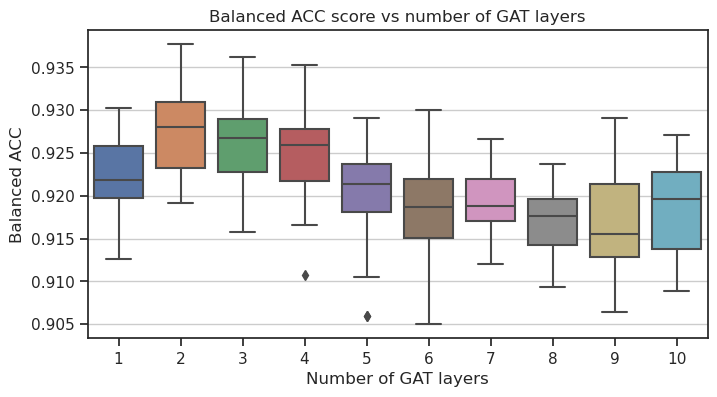

In [29]:
import seaborn as sns

sns.set(rc={"figure.figsize":(8, 4)})
sns.set_theme(style='white')
sns.set_style("ticks",{'axes.grid' : True})

df = ablation_common_df[(ablation_common_df["gnn_layer_type"] == "GAT") & (ablation_common_df["graph_layer_size"] == 256) & (ablation_common_df["global_pooling"] == "ADD")]
plt = sns.boxplot(data=df, x="n_gnn_layers", y="balanced_acc")
plt.set(xlabel ="Number of GAT layers", ylabel = "Balanced ACC", title ='Balanced ACC score vs number of GAT layers')

In [70]:
df.groupby(["n_gnn_layers"])[["balanced_acc", "f1", "precision", "recall"]].agg(["mean", "count", "std"])

balanced_acc                        f1                 precision  \
                     mean count       std      mean count       std      mean   
n_gnn_layers                                                                    
1                0.922471    30  0.004252  0.922436    30  0.003824  0.922050   
2                0.927514    30  0.004948  0.927428    30  0.004937  0.927371   
3                0.926134    30  0.005342  0.926058    30  0.005139  0.926001   
4                0.924892    30  0.005128  0.924806    30  0.005109  0.924713   
5                0.920202    30  0.005470  0.920117    30  0.005322  0.920044   
6                0.918206    30  0.005624  0.918115    30  0.005635  0.917992   
7                0.918960    30  0.003622  0.918866    30  0.003752  0.918729   
8                0.916690    30  0.004102  0.916598    30  0.004142  0.916454   
9                0.916450    30  0.005766  0.916360    30  0.005668  0.916273   
10               0.918310    30  0.005736  0.918215    30  0.005688  0.918188   

                                recall                  
             count       std      mean count       std  
n_gnn_layers                                            
1               30  0.004095  0.922829    30  0.004391  
2               30  0.005180  0.927487    30  0.004914  
3               30  0.005112  0.926118    30  0.005366  
4               30  0.005380  0.924901    30  0.005053  
5               30  0.005405  0.920192    30  0.005472  
6               30  0.005880  0.918240    30  0.005610  
7               30  0.004296  0.919006    30  0.003546  
8               30  0.004528  0.916746    30  0.004068  
9               30  0.005786  0.916450    30  0.005778  
10              30  0.005825  0.918246    30  0.005764

### Variable gnn layer size

[Text(0.5, 0, 'GNN embedding size'),
 Text(0, 0.5, 'Balanced ACC'),
 Text(0.5, 1.0, 'Balanced ACC score vs GNN embedding size')]

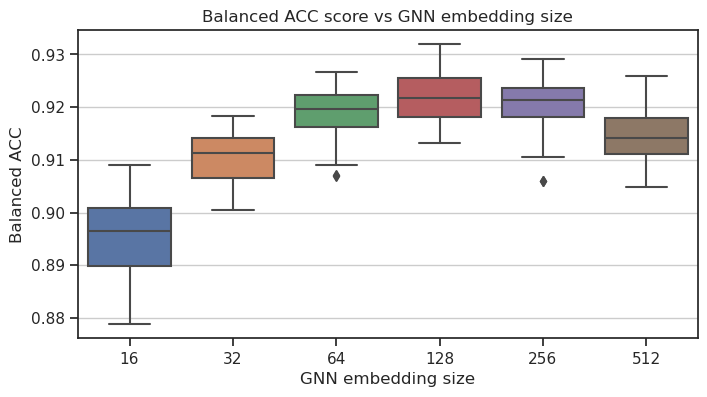

In [30]:
import seaborn as sns

df = ablation_common_df[(ablation_common_df["gnn_layer_type"] == "GAT") & (ablation_common_df["n_gnn_layers"] == 5) & (ablation_common_df["global_pooling"] == "ADD")]
plt = sns.boxplot(data=df, x="graph_layer_size", y="balanced_acc")
plt.set(xlabel ="GNN embedding size", ylabel = "Balanced ACC", title ='Balanced ACC score vs GNN embedding size')

In [11]:
df.groupby(["graph_layer_size"])[["balanced_acc", "f1", "precision", "recall"]].agg(["mean", "count", "std"])

balanced_acc                        f1                  \
                         mean count       std      mean count       std   
graph_layer_size                                                          
16                   0.895469    30  0.007105  0.895343    30  0.007213   
32                   0.910318    30  0.004902  0.910217    30  0.004784   
64                   0.918759    30  0.005181  0.918680    30  0.004908   
128                  0.921933    30  0.005306  0.921845    30  0.005297   
256                  0.920202    30  0.005470  0.920117    30  0.005322   
512                  0.914726    30  0.005332  0.914617    30  0.005587   

                 precision                    recall                  
                      mean count       std      mean count       std  
graph_layer_size                                                      
16                0.895265    30  0.007537  0.895426    30  0.007135  
32                0.910166    30  0.005055  0.910271    30  0.004853  
64                0.918608    30  0.004867  0.918756    30  0.005201  
128               0.921744    30  0.005454  0.921949    30  0.005364  
256               0.920044    30  0.005405  0.920192    30  0.005472  
512               0.914495    30  0.006051  0.914742    30  0.005354

### Variable gnn layer type

[Text(0.5, 0, 'GNN embedding method'),
 Text(0, 0.5, 'Balanced ACC'),
 Text(0.5, 1.0, 'Balanced ACC score vs GNN embedding method')]

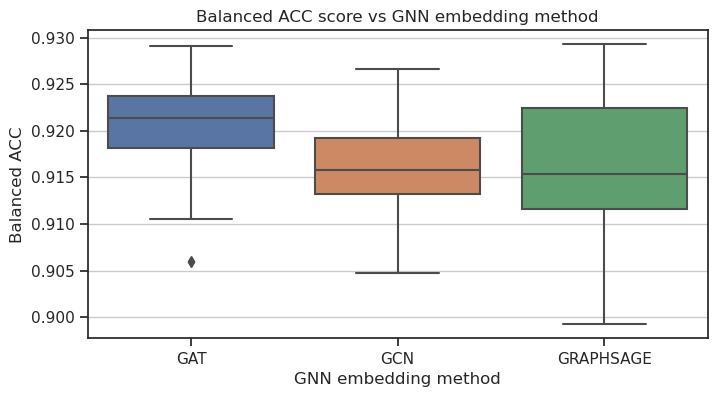

In [31]:
import seaborn as sns

df = ablation_common_df[(ablation_common_df["graph_layer_size"] == 256) & (ablation_common_df["n_gnn_layers"] == 5) & (ablation_common_df["global_pooling"] == "ADD")]
plt = sns.boxplot(data=df, x="gnn_layer_type", y="balanced_acc")
plt.set(xlabel ="GNN embedding method", ylabel = "Balanced ACC", title ='Balanced ACC score vs GNN embedding method')

In [16]:
df.groupby(["gnn_layer_type"])[["balanced_acc", "f1", "precision", "recall"]].agg(["mean", "count", "std"])

balanced_acc                        f1                  \
                       mean count       std      mean count       std   
gnn_layer_type                                                          
GAT                0.920202    30  0.005470  0.920117    30  0.005322   
GCN                0.916073    30  0.005188  0.915991    30  0.004910   
GRAPHSAGE          0.916274    30  0.007394  0.916172    30  0.007484   

               precision                    recall                  
                    mean count       std      mean count       std  
gnn_layer_type                                                      
GAT             0.920044    30  0.005405  0.920192    30  0.005472  
GCN             0.915925    30  0.004862  0.916059    30  0.005215  
GRAPHSAGE       0.916085    30  0.007641  0.916261    30  0.007507

### Variable global pooling

[Text(0.5, 0, 'Prediction head'),
 Text(0, 0.5, 'Balanced ACC'),
 Text(0.5, 1.0, 'Balanced ACC score vs prediction head')]

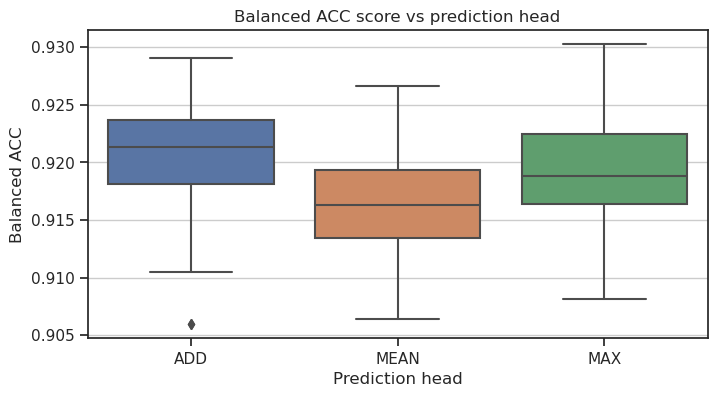

In [33]:
import seaborn as sns

df = ablation_common_df[(ablation_common_df["graph_layer_size"] == 256) & (ablation_common_df["n_gnn_layers"] == 5) & (ablation_common_df["gnn_layer_type"] == "GAT")]
plt = sns.boxplot(data=df, x="global_pooling", y="balanced_acc")
plt.set(xlabel ="Prediction head", ylabel = "Balanced ACC", title ='Balanced ACC score vs prediction head')

In [18]:
df.groupby(["global_pooling"])[["balanced_acc", "f1", "precision", "recall"]].agg(["mean", "count", "std"])

balanced_acc                        f1                  \
                       mean count       std      mean count       std   
global_pooling                                                          
ADD                0.920202    30  0.005470  0.920117    30  0.005322   
MAX                0.919305    30  0.004972  0.919211    30  0.005094   
MEAN               0.916033    30  0.005190  0.915926    30  0.005360   

               precision                    recall                  
                    mean count       std      mean count       std  
global_pooling                                                      
ADD             0.920044    30  0.005405  0.920192    30  0.005472  
MAX             0.919037    30  0.005521  0.919388    30  0.004904  
MEAN            0.915855    30  0.005828  0.915999    30  0.005132